# Importing libraries

In [9]:
# pandas
import pandas as pd


# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# feature tuning
from category_encoders import CountEncoder

Dataset downloaded from kaggle link [here](https://www.kaggle.com/datasets/shrutipandit707/onlineretaildata)

Description of the dataset
-----------
This is an online retail dataset that can be used for frequency,recency and monetary analysis and for applying clustering algorithms such as K-Means. It's a great dataset for practicing Clustering Algorithms.

# Importing data and EDA

In [6]:
df = pd.read_csv('Online_Retail.csv')

In [7]:
# check few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# data types of each features
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## Duplicate row

In [30]:
100 * df[df.duplicated()].shape[0]/df.shape[0]

0.9721189350979592

0.97% training examples are duplicate row

* Question : Should the duplicate data be removed to run clustering algorithm? (Asked in [Stack](https://stats.stackexchange.com/questions/152808/do-i-need-to-remove-duplicate-objects-for-cluster-analysis-of-objects))

* Answer
    * "Having duplicates indicate that those are particularly likely combinations of variable values, which should get a higher weight because of that. This means observations with the same values do not become redundant."
    * If your data set has lots of duplicates, it can accelerate the processing a lot to merge them and use weights instead.

## Missing values

In [29]:
# which features has missing values() 
df.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [66]:
df["Description"].isna().sum()/df.shape[0], df["CustomerID"].isna().sum()/df.shape[0]

(0.002683107311375157, 0.249266943342886)

"Description"(0.27%) and "CustomerID" (24.9%) columns has missing entry

* Question: What imputing strategy should we take for customerID?
* Answer: Check the correlation between customerID and invoice no or other features, Might be this is a redundant feature and we can get rid of this easily


## Encoding the categorical features

### Stock code

In [87]:
len(df['StockCode'].value_counts())

4070

"StockCode" has very high cardinality

In [88]:
# How much fraction top n category"?
df['StockCode'].value_counts().sort_values(ascending=False).head(100).sum()/df.shape[0]

0.1882419372994359

Very high cardinality, will use frequency encoding

In [93]:
CountEncoder(cols=['StockCode']).fit(df).transform(df).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,2313,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,355,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,296,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,474,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,452,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
5,536365,389,SET 7 BABUSHKA NESTING BOXES,2,1/12/2010 8:26,7.65,17850.0,United Kingdom
6,536365,141,GLASS STAR FROSTED T-LIGHT HOLDER,6,1/12/2010 8:26,4.25,17850.0,United Kingdom
7,536366,516,HAND WARMER UNION JACK,6,1/12/2010 8:28,1.85,17850.0,United Kingdom
8,536366,415,HAND WARMER RED POLKA DOT,6,1/12/2010 8:28,1.85,17850.0,United Kingdom
9,536367,1502,ASSORTED COLOUR BIRD ORNAMENT,32,1/12/2010 8:34,1.69,13047.0,United Kingdom


### Country

In [112]:
df['Country'].value_counts().head(5)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

Question: Any special techniques to encode country name for clustering algorithm? Say for example if we perform label encoding then some information like common habit amonst subcontinent information may be lost. So coordinate can be used!

`Do One hot encoding`

### Invoice date

Use Cyclical transformer or other similar techniques to transform datetime. 

References:
* [Search Engine](https://www.google.com/search?q=how+to+encode+data+time+in+machine+learning&oq=how+to+encode+data+time+in+mach&aqs=chrome.1.69i57j33i160j33i21l2j33i22i29i30l6.9079j0j7&sourceid=chrome&ie=UTF-8)
* [Kaggle](https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning)
* [Stack exchange](https://stats.stackexchange.com/questions/311494/best-practice-for-encoding-datetime-in-machine-learning)

### InvoiceNo 

Invoice number should not be encoded because those are the smallest clusters. Have to think about it.

In [107]:
a = pd.to_numeric(df['InvoiceNo'], errors='coerce')
df[a.isna()]['InvoiceNo'].unique()
print('# of non-numerical entry',a.isna().sum())

# of non-numerical entry 9289


In [70]:
x = [int(str(i).replace('C','').replace('A','')) for i in df.loc[:,"InvoiceNo"].to_numpy()]

In [109]:
df.loc[:,'InvoiceNo'] = df.apply(lambda Z: int(str(Z['InvoiceNo']).replace('C','').replace('A','')), axis=1)

In [110]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

That's surely a mistake, and correcting that we can get `InvoiceNo` as **int**

### Description

In [121]:
df['Description'].value_counts()#.sort_values(ascending=False).head(10).sum()/df.shape[0]

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

This part might have been redundunt and we have to check correlations, and we have to rely on stockCode, and encode that wisely such that no information is lost

## Correlation between customerID and other features

Correlation of two categorical variable: link [HERE](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)

Question: How to visualize relationship of two categorical variables

<AxesSubplot:xlabel='StockCode', ylabel='Description'>

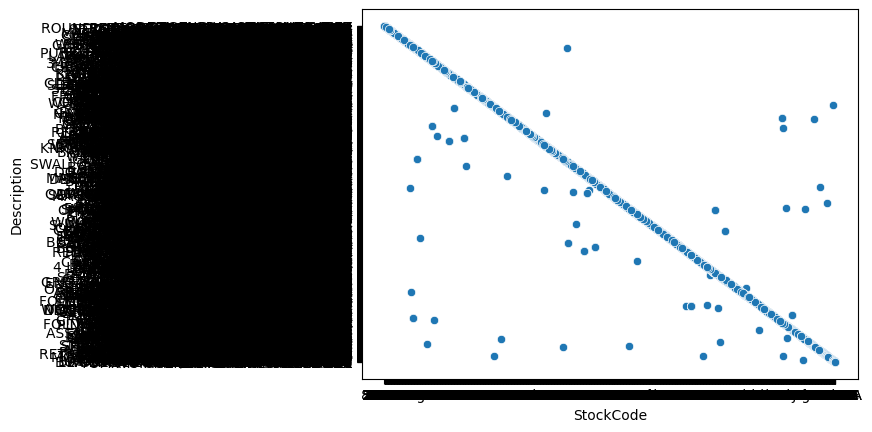

In [47]:
sns.scatterplot(data=df.sample(frac=0.01), x='StockCode', y='Description', )

Surely they are highly correlated but we have to find a good way to vsualize

<AxesSubplot:xlabel='StockCode', ylabel='UnitPrice'>

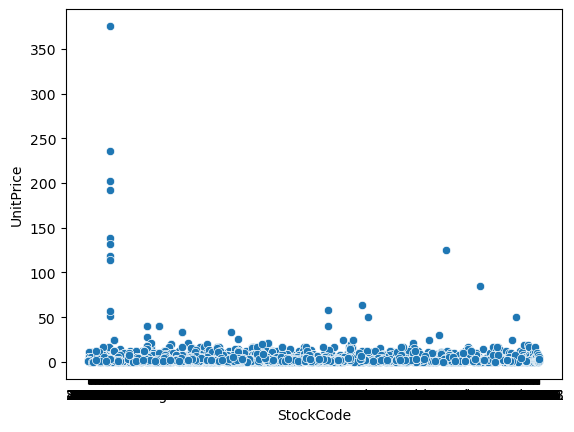

In [113]:
sns.scatterplot(data=df.sample(frac=0.01), x='StockCode', y='UnitPrice', )

<AxesSubplot:xlabel='CustomerID', ylabel='InvoiceNo'>

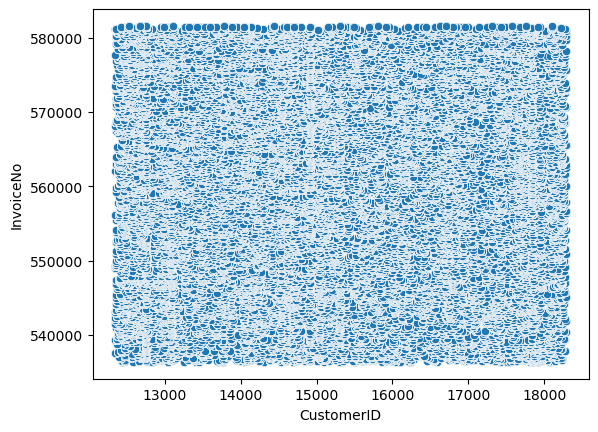

In [116]:
sns.scatterplot(data=df, x='CustomerID', y='InvoiceNo')

/home/soumen/source/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/soumen/source/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='CustomerID', ylabel='InvoiceNo'>

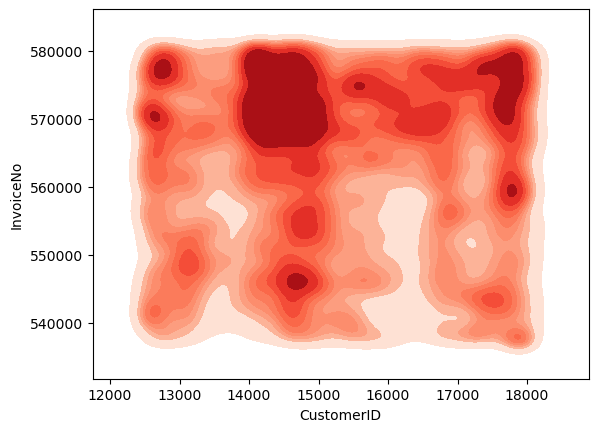

In [117]:
sns.kdeplot(df['CustomerID'], 
            df['InvoiceNo'],
            color='r', shade=True,
            cmap="Reds", shade_lowest=False)

Invoice no should be unique, but here I see it's not, several customerID with same Invoice no

In [121]:
df.query('InvoiceNo==573585')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
430237,573585,11001,ASSTD DESIGN RACING CAR PEN,2,31-10-2011 14:41,3.29,NaN,United Kingdom
430238,573585,15036,ASSORTED COLOURS SILK FAN,15,31-10-2011 14:41,1.63,NaN,United Kingdom
430239,573585,15039,SANDALWOOD FAN,15,31-10-2011 14:41,1.63,NaN,United Kingdom
430240,573585,15056BL,EDWARDIAN PARASOL BLACK,1,31-10-2011 14:41,12.46,NaN,United Kingdom
430241,573585,15056N,EDWARDIAN PARASOL NATURAL,1,31-10-2011 14:41,12.46,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
431346,573585,90209C,PINK ENAMEL+GLASS HAIR COMB,3,31-10-2011 14:41,2.07,NaN,United Kingdom
431347,573585,90214S,"LETTER ""S"" BLING KEY RING",1,31-10-2011 14:41,0.83,NaN,United Kingdom
431348,573585,DOT,DOTCOM POSTAGE,1,31-10-2011 14:41,2019.05,NaN,United Kingdom
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher �20.00,1,31-10-2011 14:41,16.67,NaN,United Kingdom


In [120]:
df['InvoiceNo'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
554023       1
554022       1
554021       1
554020       1
558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

# Plan

In [122]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

* `InvoiceNo`: Made numeric (**Check whether it matches with other existing nos after removeing [CA]**), now okay
* `StockCode`   : Frequency encoding 
* `Description` : Redundunt (Stock Code is a better description)
* `Quantity`    : OK
*  `InvoiceDate` : Cyclic trasformation (TBD)
* `UnitPrice` : OK
* `CustomerID`: Lots of NaN, can it be redundunt? Invoice No can be a good predictor. But we can use Nan as diferent category who are not regular customer
* `Country`   : OHE